In [67]:
import pandas as pd
import numpy as np

In [68]:
import seaborn as sns

In [75]:
pbp = pd.read_csv('pbp.csv')

<AxesSubplot:xlabel='forceGeneratedSpotTackle', ylabel='forcedFumble'>

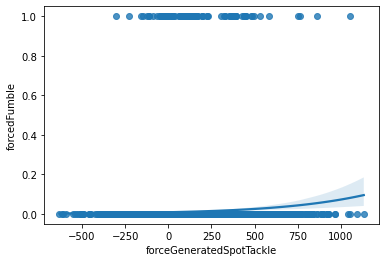

In [86]:
forceGenerated = pbp['forceGeneratedSpotTackle']
ff = pbp['forcedFumble']

sns.regplot(x=forceGenerated, y=ff, data=pbp, logistic=True)

In [5]:
pbp.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'gameId', 'playId', 'ballCarrierId',
       'tacklerNflId', 'ballCarrierDisplayName', 'ballCarrierPos',
       'tacklerName', 'tacklerPos', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'playDescription', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrientation',
       'tacklerDi

In [6]:
pbp['diffPreSnapWinProbability'] = abs(pbp['preSnapHomeTeamWinProbability'] - pbp['preSnapVisitorTeamWinProbability'])

In [7]:
pbp['diffWeight'] = pbp['tacklerWeight'] - pbp['ballCarrierWeight']

In [8]:
pbp['diffForce'] = abs(pbp['forceTackler'] - pbp['forceBallCarrier'])

In [9]:
pbp['firstDownLine'] = pbp['absoluteYardlineNumber'] - pbp['yardsToGo']

Make function to determine position of ball carrier relative to the line to gain

In [10]:
isPlayRight = pbp['ballCarrierPlayDirection'] == True

In [11]:
pbp['absoluteSpotOfTackle'] = pbp['ballCarrierX'] - 10

In [12]:
pbp['disFromFirstDown'] = 0
pbp['disToFirstDown'] = 0
for num, item in enumerate(pbp['absoluteSpotOfTackle']):
    if (isPlayRight[num] == True):
        item = -(item - 100)
    pbp['disFromFirstDown'][num] = (abs(item - pbp['firstDownLine'][num]))
    pbp['disToFirstDown'][num] = item - pbp['firstDownLine'][num]
        
    

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\2625087476.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp['disFromFirstDown'][num] = (abs(item - pbp['firstDownLine'][num]))
C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\2625087476.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp['disToFirstDown'][num] = item - pbp['firstDownLine'][num]


In [13]:
pbp['disToFirstDown']

0       -5.67
1      -11.90
2       -5.31
3      -12.11
4      -13.39
        ...  
8198    -1.78
8199    23.47
8200    10.22
8201    -0.28
8202   -14.70
Name: disToFirstDown, Length: 8203, dtype: float64

In [14]:
len(pbp[(pbp['disToFirstDown'] >= -2) & (pbp['disToFirstDown'] <= 3) & (pbp['forcedFumble'] == 1)]) / 91

0.21978021978021978

In [15]:
len(pbp[(pbp['disToFirstDown'] >= -2) & (pbp['disToFirstDown'] <= 3) & (pbp['forcedFumble'] == 0)]) / (len(pbp) - 91)

0.21696252465483234

In [16]:
len(pbp[(pbp['disFromFirstDown'] <= 5) & (pbp['forcedFumble'] == 1)]) / 91

0.4065934065934066

In [17]:
len(pbp[(pbp['disFromFirstDown'] <= 5) & (pbp['forcedFumble'] == 0)]) / (len(pbp) - 91)

0.4297337278106509

In [18]:
pbp.to_csv('pbp.csv')

In [19]:
pbp.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'gameId', 'playId', 'ballCarrierId',
       'tacklerNflId', 'ballCarrierDisplayName', 'ballCarrierPos',
       'tacklerName', 'tacklerPos', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'playDescription', 'yardlineSide',
       'yardlineNumber', 'gameClock', 'preSnapHomeScore',
       'preSnapVisitorScore', 'passResult', 'passLength', 'penaltyYards',
       'prePenaltyPlayResult', 'playResult', 'playNullifiedByPenalty',
       'absoluteYardlineNumber', 'offenseFormation', 'defendersInTheBox',
       'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrientation',
       'tacklerDi

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
pbp['diffInOrientationVsDirTackler'] = 0
def OvsDir(O, Dir):
    for num, item in enumerate(O):
        diffInODir = 0
        d = Dir[num]
        if (abs(item - Dir[num]) >= 180):
            if(item <= 100):
                diffInODir = item + 360
                diffInODir = abs(diffInODir - d)
            else:
                diffInODir = d + 360
                diffInODir = abs(diffInODir - item)
        else:
            diffInODir = abs(item - d)
        pbp['diffInOrientationVsDirTackler'][num] = diffInODir
        
OvsDir(pbp['tacklerOrientation'], pbp['tacklerDirectionAngle'])

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\4098036765.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp['diffInOrientationVsDirTackler'][num] = diffInODir


In [22]:
pbp['diffInOrientationVsDirTackler']

0       11.55
1        9.01
2       12.66
3       43.37
4       15.88
        ...  
8198    32.65
8199    65.67
8200     0.15
8201     9.55
8202    26.74
Name: diffInOrientationVsDirTackler, Length: 8203, dtype: float64

In [23]:
tacklerAlignment = pbp['diffInOrientationVsDirTackler']

In [24]:
pbp['diffInOrientationVsDirBallCarrier'] = 0
def OvsDir(O, Dir):
    for num, item in enumerate(O):
        diffInODir = 0
        d = Dir[num]
        if (abs(item - Dir[num]) >= 180):
            if(item <= 100):
                diffInODir = item + 360
                diffInODir = abs(diffInODir - d)
            else:
                diffInODir = d + 360
                diffInODir = abs(diffInODir - item)
        else:
            diffInODir = abs(item - d)
        pbp['diffInOrientationVsDirBallCarrier'][num] = diffInODir
        
OvsDir(pbp['ballCarrierOrientation'], pbp['ballCarrierDirectionAngle'])

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\596152775.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp['diffInOrientationVsDirBallCarrier'][num] = diffInODir


In [25]:
ballCarrierAlignment = pbp['diffInOrientationVsDirBallCarrier']

In [26]:
pbp.to_csv('pbp.csv')

Angle of tackle calculation: (180 degrees being face on while 0 degrees being directly behind)

In [27]:
pbp['tackleAngle'] = 0
def angleOfTackle(Ocarrier, dirTackler):
    for num, item in enumerate(Ocarrier):
        ta = 0
        d = dirTackler[num]
        if (abs(item - d) >= 180):
            if (item >= 180):
                d = d + 360
                ta = abs(item - d)
            elif (item <= 180):
                item = item + 360
                ta = abs(item - d)
        else:
            ta = abs(item - d)
        pbp['tackleAngle'][num] = ta
        
angleOfTackle(pbp['ballCarrierOrientation'], pbp['tacklerDirectionAngle'])

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\2438006892.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pbp['tackleAngle'][num] = ta


In [28]:
tackleAngle = pbp['tackleAngle']

In [29]:
pbp['tackleDisFromCenter'] = abs(pbp['tacklerY'] - 26.65)

In [30]:
disFromCenter = pbp['tackleDisFromCenter']

In [34]:
newpbp = pd.read_csv('newpbp.csv')

In [35]:
newpbp.head()

,gameId,playId,ballCarrierId,tacklerNflId,ballCarrierDisplayName,ballCarrierPos,tacklerName,tacklerPos,quarter,down,...,tacklerAcc,tacklerOrientation,tacklerDirectionAngle,ballCarrierPlayDirection,ballCarrierX,ballCarrierY,ballCarrierSpeed,ballCarrierrAcc,ballCarrierrOrientation,ballCarrierDirectionAngle
0,2022100908,3537,48723,43306.0,Parker Hesse,TE,Keanu Neal,FS,4,1,...,1.77,77.58,75.43,left,62.52,28.72,3.30,1.62,225.64,252.68
1,2022100908,3537,48723,43306.0,Parker Hesse,TE,Keanu Neal,FS,4,1,...,2.95,188.62,183.23,left,60.61,27.36,1.02,0.86,251.91,244.70
2,2022091103,3126,52457,44872.0,Chase Claypool,WR,Chidobe Awuzie,CB,4,1,...,1.20,116.44,21.08,left,80.25,30.28,7.68,0.69,353.90,7.31
3,2022091103,3126,52457,44872.0,Chase Claypool,WR,Chidobe Awuzie,CB,4,1,...,1.88,300.76,110.05,left,72.66,51.82,3.36,2.05,326.10,281.94
4,2022091103,3126,52457,47855.0,Chase Claypool,WR,Germaine Pratt,OLB,4,1,...,2.92,104.09,78.82,left,80.25,30.28,7.68,0.69,353.90,7.31


In [36]:
newpbp.columns

Index(['gameId', 'playId', 'ballCarrierId', 'tacklerNflId',
       'ballCarrierDisplayName', 'ballCarrierPos', 'tacklerName', 'tacklerPos',
       'quarter', 'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam',
       'playDescription', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'event',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'assist', 'forcedFumble', 'pff_missedTackle',
       'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrient

In [37]:
newpbp.set_index(['gameId','playId'])

ballCarrierId  tacklerNflId ballCarrierDisplayName  \
gameId     playId                                                       
2022100908 3537            48723       43306.0           Parker Hesse   
           3537            48723       43306.0           Parker Hesse   
2022091103 3126            52457       44872.0         Chase Claypool   
           3126            52457       44872.0         Chase Claypool   
           3126            52457       47855.0         Chase Claypool   
...                          ...           ...                    ...   
2022100207 2777            52449       47971.0        Jonathan Taylor   
2022102308 905             54572       42391.0          Dameon Pierce   
           905             54572       42391.0          Dameon Pierce   
           905             54572       53509.0          Dameon Pierce   
           905             54572       53509.0          Dameon Pierce   

                  ballCarrierPos      tacklerName tacklerPos  quarter  down  \
gameId     playId                                                             
2022100908 3537               TE       Keanu Neal         FS        4     1   
           3537               TE       Keanu Neal         FS        4     1   
2022091103 3126               WR   Chidobe Awuzie         CB        4     1   
           3126               WR   Chidobe Awuzie         CB        4     1   
           3126               WR   Germaine Pratt        OLB        4     1   
...                          ...              ...        ...      ...   ...   
2022100207 2777               RB       David Long        ILB        3     1   
2022102308 905                RB  Denzel Perryman        ILB        2     3   
           905                RB  Denzel Perryman        ILB        2     3   
           905                RB    Divine Deablo        OLB        2     3   
           905                RB    Divine Deablo        OLB        2     3   

                   yardsToGo possessionTeam  ... tacklerAcc  \
gameId     playId                            ...              
2022100908 3537           10            ATL  ...       1.77   
           3537           10            ATL  ...       2.95   
2022091103 3126           10            PIT  ...       1.20   
           3126           10            PIT  ...       1.88   
           3126           10            PIT  ...       2.92   
...                      ...            ...  ...        ...   
2022100207 2777           10            IND  ...       1.39   
2022102308 905             1            HOU  ...       2.07   
           905             1            HOU  ...       2.80   
           905             1            HOU  ...       2.09   
           905             1            HOU  ...       1.42   

                  tacklerOrientation tacklerDirectionAngle  \
gameId     playId                                            
2022100908 3537                77.58                 75.43   
           3537               188.62                183.23   
2022091103 3126               116.44                 21.08   
           3126               300.76                110.05   
           3126               104.09                 78.82   
...                              ...                   ...   
2022100207 2777                12.61                116.12   
2022102308 905                 64.24                128.13   
           905                279.85                323.01   
           905                105.48                144.67   
           905                194.75                221.27   

                   ballCarrierPlayDirection ballCarrierX  ballCarrierY  \
gameId     playId                                                        
2022100908 3537                        left        62.52         28.72   
           3537                        left        60.61         27.36   
2022091103 3126                        left        80.25         30.28   
           3126                        left 

In [38]:
newpbp['tacklerMass'] = newpbp['tacklerWeight'] / 2.2

In [39]:
newpbp['ballCarrierMass'] = newpbp['ballCarrierWeight'] / 2.2
        
newpbp['differenceAngularDirection'] = abs(newpbp['tacklerDirectionAngle'] - newpbp['ballCarrierDirectionAngle'])

In [40]:
newpbp['forceTackler'] = newpbp['tacklerMass'] * newpbp['tacklerAcc']
newpbp['forceBallCarrier'] = newpbp['ballCarrierMass'] * newpbp['ballCarrierrAcc']

In [41]:
def percentOfBallCarrierForce(x):
    percent_force_component = 0
    if (x <= 90): 
        percent_force_component = np.cos(x * (np.pi/180)) * (-1)
    elif ((x > 90) and (x <= 180)):
        percent_force_component = np.sin((x-90) * (np.pi/180))
    elif ((x > 180) and (x <= 270)):
        percent_force_component = np.cos((x-180) * (np.pi/180))
    else:
        percent_force_component = np.sin((x-270) * (np.pi/180)) * (-1)
    
    return percent_force_component
        

In [43]:
newpbp['addedForceComponent'] = newpbp['differenceAngularDirection'].apply(lambda x: percentOfBallCarrierForce(x)) * newpbp['forceBallCarrier']

In [58]:
newpbp['forceGeneratedSpotTackle'] = newpbp['addedForceComponent'] + newpbp['forceTackler']

In [45]:
newpbp['firstDownLine'] = newpbp['absoluteYardlineNumber'] - newpbp['yardsToGo']

In [46]:
isPlayRight = newpbp['ballCarrierPlayDirection'] == True

In [49]:
newpbp['absoluteSpotOfTackle'] = newpbp['ballCarrierX'] - 10

In [50]:
newpbp['disFromFirstDown'] = 0
newpbp['disToFirstDown'] = 0
for num, item in enumerate(newpbp['absoluteSpotOfTackle']):
    if (isPlayRight[num] == True):
        item = -(item - 100)
    newpbp['disFromFirstDown'][num] = (abs(item - newpbp['firstDownLine'][num]))
    newpbp['disToFirstDown'][num] = item - newpbp['firstDownLine'][num]
        

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\2473047615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newpbp['disFromFirstDown'][num] = (abs(item - newpbp['firstDownLine'][num]))
C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\2473047615.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newpbp['disToFirstDown'][num] = item - newpbp['firstDownLine'][num]


In [53]:
newpbp['diffInOrientationVsDirTackler'] = 0
def OvsDir(O, Dir):
    for num, item in enumerate(O):
        diffInODir = 0
        d = Dir[num]
        if (abs(item - Dir[num]) >= 180):
            if(item <= 100):
                diffInODir = item + 360
                diffInODir = abs(diffInODir - d)
            else:
                diffInODir = d + 360
                diffInODir = abs(diffInODir - item)
        else:
            diffInODir = abs(item - d)
        newpbp['diffInOrientationVsDirTackler'][num] = diffInODir
        
OvsDir(newpbp['tacklerOrientation'], newpbp['tacklerDirectionAngle'])

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\361282657.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newpbp['diffInOrientationVsDirTackler'][num] = diffInODir


In [56]:
newpbp['tackleAngle'] = 0
def angleOfTackle(Ocarrier, dirTackler):
    for num, item in enumerate(Ocarrier):
        ta = 0
        d = dirTackler[num]
        if (abs(item - d) >= 180):
            if (item >= 180):
                d = d + 360
                ta = abs(item - d)
            elif (item <= 180):
                item = item + 360
                ta = abs(item - d)
        else:
            ta = abs(item - d)
        newpbp['tackleAngle'][num] = ta
        
angleOfTackle(newpbp['ballCarrierrOrientation'], newpbp['tacklerDirectionAngle'])

C:\Users\bwebe\AppData\Local\Temp\ipykernel_12000\4113721022.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newpbp['tackleAngle'][num] = ta


In [59]:
newpbp.columns

Index(['gameId', 'playId', 'ballCarrierId', 'tacklerNflId',
       'ballCarrierDisplayName', 'ballCarrierPos', 'tacklerName', 'tacklerPos',
       'quarter', 'down', 'yardsToGo', 'possessionTeam', 'defensiveTeam',
       'playDescription', 'yardlineSide', 'yardlineNumber', 'gameClock',
       'preSnapHomeScore', 'preSnapVisitorScore', 'passResult', 'passLength',
       'penaltyYards', 'prePenaltyPlayResult', 'playResult', 'event',
       'playNullifiedByPenalty', 'absoluteYardlineNumber', 'offenseFormation',
       'defendersInTheBox', 'passProbability', 'preSnapHomeTeamWinProbability',
       'preSnapVisitorTeamWinProbability', 'homeTeamWinProbabilityAdded',
       'visitorTeamWinProbilityAdded', 'expectedPoints', 'expectedPointsAdded',
       'tackle', 'assist', 'forcedFumble', 'pff_missedTackle',
       'ballCarrierHeight', 'ballCarrierWeight', 'tacklerHeight',
       'tacklerWeight', 'tacklerPlayDirection', 'tacklerX', 'tacklerY',
       'tacklerSpeed', 'tacklerAcc', 'tacklerOrient

In [60]:
newpbp['forceGeneratedSpotTackle']

0        365.751398
1        240.906216
2         41.032589
3        382.025481
4        302.602953
            ...    
32280    -82.333960
32281    352.533045
32282     92.375807
32283    260.842080
32284   -113.995803
Name: forceGeneratedSpotTackle, Length: 32285, dtype: float64

In [61]:
newpbp['tackleDisFromCenter'] = abs(newpbp['tacklerY'] - 26.65)

In [62]:
newpbp.to_csv('newpbp.csv')

In [63]:
newpbp.head()

,gameId,playId,ballCarrierId,tacklerNflId,ballCarrierDisplayName,ballCarrierPos,tacklerName,tacklerPos,quarter,down,...,forceBallCarrier,addedForceComponent,disFromFirstDown,disToFirstDown,firstDownLine,absoluteSpotOfTackle,diffInOrientationVsDirTackler,tackleAngle,forceGeneratedSpotTackle,tackleDisFromCenter
0,2022100908,3537,48723,43306.0,Parker Hesse,TE,Keanu Neal,FS,4,1,...,192.190909,191.969579,6.48,-6.48,59,52.52,2.15,150.21,365.751398,0.79
1,2022100908,3537,48723,43306.0,Parker Hesse,TE,Keanu Neal,FS,4,1,...,102.027273,-48.730148,8.39,-8.39,59,50.61,5.39,68.68,240.906216,0.81
2,2022091103,3126,52457,44872.0,Chase Claypool,WR,Chidobe Awuzie,CB,4,1,...,71.195455,-69.149229,4.25,4.25,66,70.25,95.36,27.18,41.032589,15.49
3,2022091103,3126,52457,44872.0,Chase Claypool,WR,Chidobe Awuzie,CB,4,1,...,211.522727,209.407299,3.34,-3.34,66,62.66,169.29,143.95,382.025481,24.90
4,2022091103,3126,52457,47855.0,Chase Claypool,WR,Germaine Pratt,OLB,4,1,...,71.195455,-22.578865,4.25,4.25,66,70.25,25.27,84.92,302.602953,7.97


In [87]:
formula = 'ff ~ fGenSpotTackle+tackleAngle+disFromCenter+disToFirstDown+disFromFirstDown+diffInOrientationVsDirTackler+passProb+diffAcc+diffSpeed+diffForce+ydsToGo+ep+diffWinProb+ballCarrierSpeed+tacklerSpeed+ballCarrierMass+tacklerMass+forceTackler+ballCarrierForce+tacklerAcc+ballCarrierAcc+absSpotTackle'
model = smf.glm(formula = formula, data=pbp, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     ff   No. Observations:                 7982
Model:                            GLM   Df Residuals:                     7959
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -427.01
Date:                Sun, 31 Dec 2023   Deviance:                       854.03
Time:                        17:27:41   Pearson chi2:                 8.73e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.01644
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [83]:
fGenSpotTackle = pbp['forceGeneratedSpotTackle']
tackleAngle = pbp['tackleAngle']
disFromCenter = pbp['tackleDisFromCenter']
disToFirstDown = pbp['disToFirstDown']
disFromFirstDown = pbp['disFromFirstDown']
diffInOrientationVsDirTackler = pbp['diffInOrientationVsDirTackler']
passProb = pbp['passProbability']
diffAcc = pbp['diffAcc']
diffSpeed = pbp['diffSpeed']
diffForce = pbp['diffForce']
ydsToGo = pbp['yardsToGo']
ep = pbp['expectedPoints']
diffWinProb = pbp['diffPreSnapWinProbability']
ballCarrierSpeed = pbp['ballCarrierSpeed']
tacklerSpeed = pbp['tacklerSpeed']
ballCarrierMass = pbp['ballCarrierMass']
tacklerMass = pbp['tacklerMass']
forceTackler = pbp['forceTackler']
ballCarrierForce = pbp['forceBallCarrier']
tacklerAcc = pbp['tacklerAcc']
ballCarrierAcc = pbp['ballCarrierAcc']
absSpotTackle = pbp['absoluteSpotOfTackle']